In [1]:
import numpy as np
import mnist
from tensorflow import keras

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
eachImg = pd.DataFrame(train_images[2])

In [9]:
eachImg.to_csv("d:/eachImg.csv")

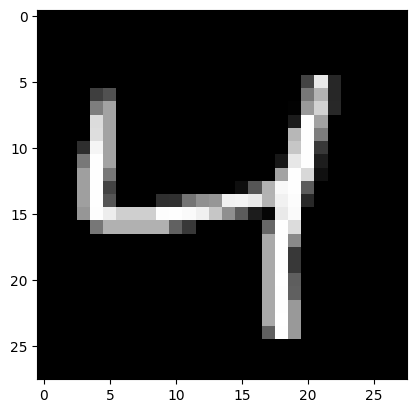

In [11]:
plt.imshow(train_images[2],cmap="gray")

In [12]:
train_images = (train_images / 255)
test_images = (test_images / 255)

In [13]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [14]:
train_labels_one_hot[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
np.argmax(train_labels_one_hot[2])

4

###모델생성

In [16]:
#intput layer
input_shape = train_images[0].shape

In [17]:
#output layer
nClasses = 10
nClasses =len(np.unique(train_labels))

In [18]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(units=16, activation='relu', input_shape=input_shape))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=nClasses,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


###B-2모델 컴파일

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=["accuracy"])

### b-3 모델훈련

In [21]:
train_images.shape

(60000, 28, 28)

In [23]:
history = model.fit(x=train_images,
                    y=train_labels_one_hot,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2
                    )

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4875 - accuracy: 0.8561 - val_loss: 0.2619 - val_accuracy: 0.9252
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2466 - accuracy: 0.9286 - val_loss: 0.2120 - val_accuracy: 0.9395
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2094 - accuracy: 0.9397 - val_loss: 0.1953 - val_accuracy: 0.9447
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1858 - accuracy: 0.9456 - val_loss: 0.1854 - val_accuracy: 0.9482
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1719 - accuracy: 0.9498 - val_loss: 0.1774 - val_accuracy: 0.9492
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1590 - accuracy: 0.9538 - val_loss: 0.1855 - val_accuracy: 0.9446
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1495 - accuracy: 0.9551 - val_loss: 0.1673 - val_accuracy:

### c-1.모델추론

In [24]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 1ms/step - loss: 0.1659 - accuracy: 0.9548


[0.16589276492595673, 0.954800009727478]

#c-1예측

In [25]:
import cv2

In [26]:
testImg = cv2.imread("./img/img_18.jpg", cv2.IMREAD_GRAYSCALE)

In [27]:
import matplotlib.pyplot as plt